# Machine Learning 

## Scikit-learn

H βιβλιοθήκη sklearn αποτελείται από πολλούς και διαφορετικούς αλγορίθμους που σχετίζονται με τη μηχανική μάθηση. Είναι αρκετά απλή στη χρήση και περιέχει πολλά εργαλεία για εξόρυξη γνώσης από δεδομένα, ανάλυση και οπτικοποιήση. Έχει σχεδιαστεί ώστε να τρέχει σε περιβάλλον Python και χρειάζεται απαραιτήτως τις βιβλιοθήκες NumPy και SciPy. 
![Image of operators](https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg)

## 1. Linear Regression 

Η βιβλιοθήκη αυτή έχει ενσωματωμένες ορισμένες βάσεις δεδομένων, οπότε πριν αρχίσουμε να χρησιμοποιούμε τα δικά μας δεδομένα θα δοκιμάσουμε τη γραμμική παλινδρόμηση με τα δεδομένα από τα σπίτια της Καλιφόρνιας. Παραπάνω πληροφορίες για τα δεδομένα μπορείτε να βρείτε [εδώ](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).


Στόχος μας είναι να προβλέψουμε την τιμή κατοικίας με τα διαθέσιμα χαρακτηριστικά στέγασης χρησιμοποιώντας την τεχνική της γραμμικής παλινδρόμησης. 

Πριν ξεκινήσουμε όμως εξασκήστε τα skills σας με αυτό το τέλειο παιχνίδι ! http://guessthecorrelation.com/
    
![Image of operators](http://guessthecorrelation.com/images/guesscor_logo.svg)

#### 1. Ξεκινάμε πάντα με την εισαγωγή των απαραίτητων πακέτων και βιβλιοθηκών 

In [ ]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


#### 2. Εισάγουμε τα δεδομένα 

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
housing.data.shape

(20640, 8)

Ρίξτε μια ματιά στα δεδομένα σας

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Τα δεδομένα δεν έρχονται πάντα στην μορφή που μας βολεύει γι'αυτό πρέπει να μάθουμε να είμαστε ευέλικτοι και να γνωρίζουμε πως να διαχειριζόμαστε dictionaries.

> Indented block



Για την διαχείριση λεξικών με το scikit-learn πρέπει να ξέρετε τις παρακάτω εντολές: 

    - .DESCR      (περιγραφή)
    - .feature_names    (ονόματα στηλών)
    - .data    (features)
    - .target    (η μεταβλητή που μας ενδιαφέρει να προβλέψουμε)
    - .filename  (θέση που αποθηκεύτηκε)

In [ ]:
# Για να δούμε τα column names
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# Για να διαβάσουμε το description του California housing dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Ας ξεκινήσουμε

In [ ]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names) 
housing_df['PRICE'] = pd.DataFrame(housing.target)                           
housing_df.head()                                                           

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Τιμές που λείπουν

In [ ]:
housing_df.isnull().sum() 

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [ ]:
# ορίζουμε τις τιμές που λείπουν
missing_values = ["n/a", "na", "--", 999,9999]   
# τις αλλάζουμε όνομα
housing_df.replace(to_replace = missing_values, value = np.nan, inplace = True) 
# πετάμε τις γραμμές με NaNs 
housing_df.dropna(inplace=True) 
# Ξαναφέρνουμε το index στη σωστή σειρά, πάντα μετά από κόψιμο και πέταμα στηλών χρειάζεται reindex
housing_df.reset_index(drop=True, inplace=True)  

Aν χρειάζεται να πετάξουμε χειροκίνητα κάποια τιμή το κάνουμε ως εξής

In [ ]:
ls_lines_to_drop = [10]  
housing_df.drop(ls_lines_to_drop, inplace=True) 
housing_df.head()    

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df.head(15)   

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


## Summary Statistics

In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20617.000000,20617.000000,20617.000000,20617.000000,20617.000000,20617.000000,20617.000000,20617.000000,20617.000000
mean,3.870560,28.639230,5.428061,1.096579,1425.956832,3.070634,35.630992,-119.568882,2.068478
std,1.899835,12.584269,2.472998,0.473829,1133.002215,10.391810,2.135937,2.003471,1.153739
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563700,18.000000,4.440329,1.006085,786.000000,2.429304,33.930000,-121.800000,1.196000
50%,3.534700,29.000000,5.228228,1.048780,1167.000000,2.817982,34.260000,-118.490000,1.797000
75%,4.742600,37.000000,6.051808,1.099526,1726.000000,3.282258,37.710000,-118.010000,2.647000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Scatterplots
***
Ας δούμε μερικά γραφήματα για 3 μεταβλητές: Block group population, Average number of rooms per household και Median income in block group.  

Text(0.5, 1.0, 'Relationship between Population and Price')

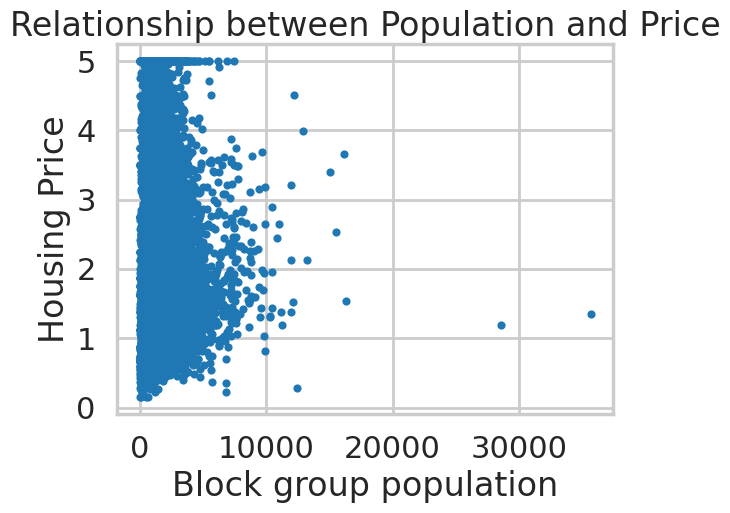

In [ ]:
plt.scatter(housing_df.Population, housing_df.PRICE, s=15)
plt.xlabel("Block group population")
plt.ylabel("Housing Price")
plt.title("Relationship between Population and Price")

## Περιγράψτε τις παρακάτω σχέσεις

Text(0.5, 1.0, 'Relationship between Rooms and Price')

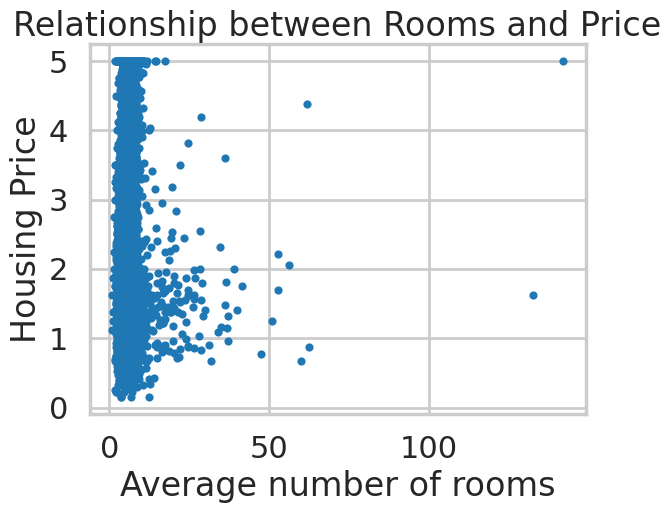

In [ ]:
plt.scatter(housing_df.AveRooms, housing_df.PRICE, s=15)
plt.xlabel("Average number of rooms")
plt.ylabel("Housing Price")
plt.title("Relationship between Rooms and Price")

Text(0.5, 1.0, 'Relationship between median income in block group and Price')

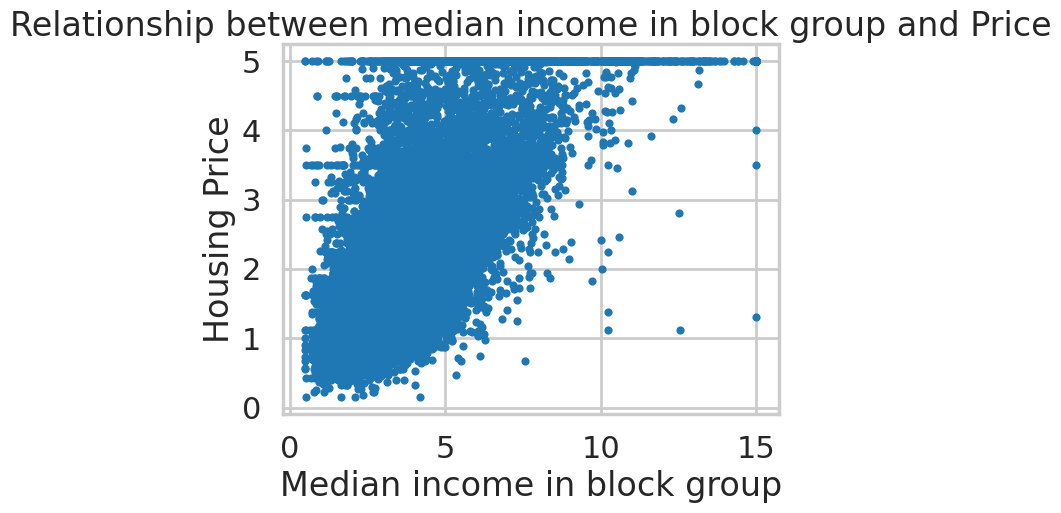

In [ ]:
plt.scatter(housing_df.MedInc, housing_df.PRICE, s=15)
plt.xlabel("Median income in block group")
plt.ylabel("Housing Price")
plt.title("Relationship between median income in block group and Price")

## Φτιάξτε 2 δικά σας scatter plots και περιγράψτε τα

### Scatterplots με τη βιβλιοθήκη Seaborn  

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) και [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) 

<Axes: xlabel='AveRooms', ylabel='PRICE'>

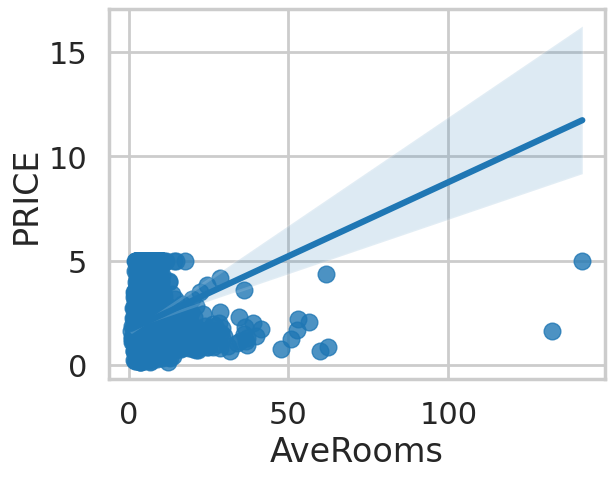

In [ ]:
sns.regplot(y="PRICE", x="AveRooms", data=housing_df, fit_reg = True)

#### Χωρισμός δεδομένων και εξερεύνηση 
Θα ξεκινήσουμε απλά με ένα feature, π.χ. number of rooms, για να προβλέψουμε το PRICE target. 


In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Στο σημείο αυτό θα χωρίσουμε (split) τα δεδομένα σε σύνολο εκπαίδευσης (train set) και σύνολο δοκιμής (test set).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split
california_train, california_test = train_test_split(housing_df, random_state=42)

In [ ]:
# Βάζουμε όλα τα features στο X_train και βγάζουμε το PRICE γιατί είναι το target
X_train = california_train.drop(columns='PRICE')
# Το target 'price' στο y_train
y_train = california_train['PRICE']

# Βάζουμε όλα τα features στο X_train και βγάζουμε το PRICE γιατί είναι το target
X_test = california_test.drop(columns = 'PRICE')
# Το target 'price' στο y_train
y_test = california_test['PRICE']

Aς σχεδιάσουμε ένα γράφημα διασποράς για την μεταβλητή που θέλουμε να προβλέψουμε

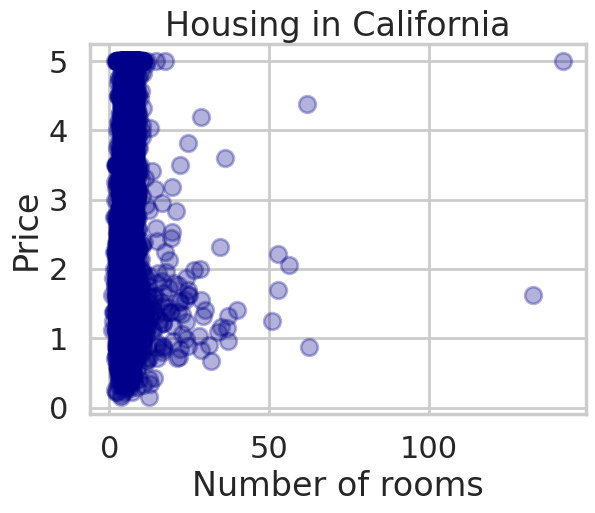

In [ ]:
# Οπτικοποίηση με scatter plot
s1 = plt.scatter(X_train['AveRooms'], y_train, color='darkblue', marker='o', alpha = 0.3)
# labels
plt.xlabel('Number of rooms')  # Set xlabel
plt.ylabel('Price') # Set ylabel
# title
plt.title('Housing in California') # Set title
# final plot
plt.show()

## Machine Learning - regression model 

Περισσότερα https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Εισάγουμε το μοντέλο Linear Regression και το κάνουμε fit

In [ ]:
from sklearn.linear_model import LinearRegression
# Εισαγωγή μοντέλου
lm = LinearRegression()
# Εκπαίδευση
lm.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Πρόβλεψη
y_pred = lm.predict(X_test)
# Υπολογισμός λάθους
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.7313320398529829


Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

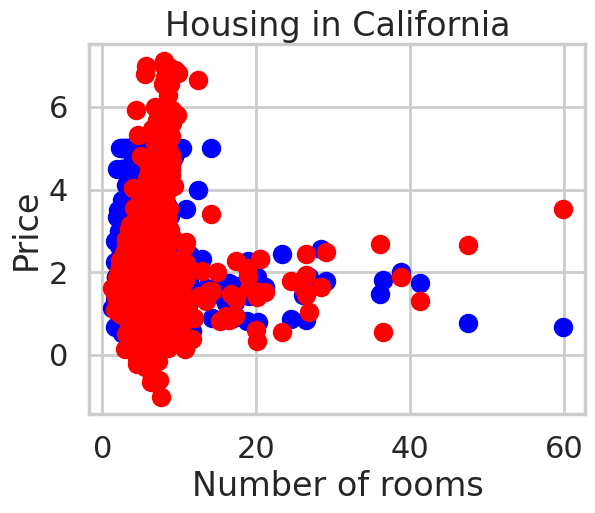

In [ ]:
# Ίδιο με το επάνω
s1 = plt.scatter(X_test['AveRooms'], y_test, color='b', marker='o') # Plot data
plt.xlabel('Number of rooms')  
plt.ylabel('Price') 
plt.title('Housing in California') 
# Αλλά τώρα προσθέσαμε την γραμμή πρόβλεψης
plt.scatter(X_test['AveRooms'], y_pred, color='red') # οπτικοποιεί την πρόβλεψη
plt.savefig('lin_reg_house_rm.png', dpi=150, bbox_inches='tight') # Σώζει την εικόνα
plt.show() 

### Linear regression με όλα τα χαρακτηριστικά

In [ ]:
# Βάζουμε όλα τα χαρακτηριστικά εκτός της μεταβλητής που θέλουμε να προβλέψουμε (PRICE)
X_test = housing_df.drop('PRICE', axis = 1)
# εδώ η μεταβλητή που θέλουμε να προβλέψουμε
y_test = housing_df['PRICE']                 
# ξεκινάμε το regression
all_reg = LinearRegression()
# Εκπαίδευση
all_reg.fit(X_test, y_test)     
# Υπολογισμός προβλέψεων
y_pred = all_reg.predict(X_test) 
# υπολογισμός root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
# υπολογισμός r squared
r2 = round(all_reg.score(X_test, y_test), 2)  
# αποτελέσματα
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))    

R2 score is 0.61
RMSE is 0.7238806135018419


Επειδή δεν έχουμε μόνο μία διάσταση τώρα, αντί να τυπώσουμε 13 μικρά γραφήματα, μπορούμε να τυπώσουμε το γράφημα της πρόβλεψης σε σχέση με το πραγματικό. 

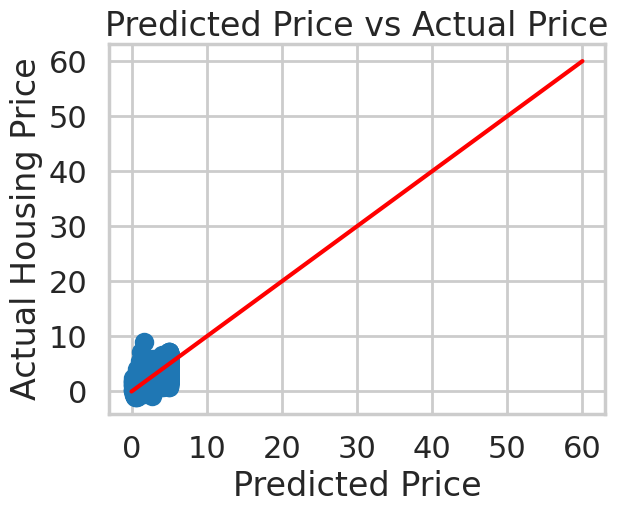

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Housing Price")
plt.title("Predicted Price vs Actual Price")

plt.xticks(np.arange(0, 70, step=10))
plt.yticks(np.arange(0, 70, step=10))

plt.plot(np.arange(0, 70, step=10), np.arange(0, 70, step=10), color = 'red')
plt.show()
plt.clf()